# **Analisis Sentimen Aplikasi Kopi Kenangan**

Kopi Kenangan merupakan perusahaan asal Indonesia yang menjual produk utama berupa minuman kopi. Kopi susu gula aren sebagai menu andalan Kopi Kenangan. Selain itu, perusahaan ini juga menjual minuman non-kopi seperti susu, teh, dan sari, beserta makanan ringan seperti kukis dan roti.

Kopi Kenangan meluncurkan aplikasi untuk mempermudah konsumen dalam membeli produknya. Konsumen dapat menggunakan aplikasi Kopi Kenangan untuk membeli produk tanpa harus datang ke gerai, sehingga menghemat waktu dan terhindar dari antre. Lebih dari 800 gerai tersebar, aplikasi ini membantu konsumen menemukan gerai terdekat dari lokasinya.

Aplikasi Kopi Kenangan dapat diunduh melalui Google Play Store (https://play.google.com/store/apps/details?id=com.kopikenangan). Aplikasi ini telah diunduh lebih dari 1 juta pengguna. Berdasarkan penilaian rating dan ulasan yang terlihat pada Google Play Store, aplikasi ini memperoleh rating 4.9 dan terdapat 142000 ulasan.

Untuk mengetahui bagaimana sentimen konsumen terhadap aplikasi Kopi Kenangan, perlu dilakukan analisis sentimen agar mengetahui apakah aplikasi ini memiliki penilaian positif, netral, atau negatif di mata konsumen.

## **Import Library**

In [43]:
import pandas as pd
import numpy as np

# google_play_scraper
!pip install google-play-scraper
from google_play_scraper import app, reviews, Sort, reviews_all


pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer #Ekstraksi fitur dengan TF-IDF
from sklearn.model_selection import train_test_split


import datetime as dt
import re  # Modul untuk bekerja dengan ekspresi reguler
import string
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # list kata-kata berhenti dalam teks

!pip install wordcloud
from wordcloud import WordCloud

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from wordcloud import WordCloud  # Membuat visualisasi word cloud

import nltk  # Import pustaka Natural Language Toolkit
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar stopwords dalam berbagai bahasa.
import nltk
nltk.download('punkt_tab') # Mengunduh the 'punkt_tab' resource.

import csv
import requests
from io import StringIO

# Metode yang digunakan untuk analisis
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metode ekstraksi fitur menggunakan Word2Vec
!pip install gensim
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## **Pengambilan Data**

### **Scraping**

Data yang digunakan untuk analisis sentimen adalah ulasan pada Google Play Store. Jumlah maksimum data yang diambil adalah 142000 data

In [44]:
# Proses scraping
scrapreview = reviews_all(
    'com.kopikenangan',      # ID aplikasi
    lang='id',               # Bahasa ulasan (default: 'en')
    country='id',            # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=142000             # Jumlah maksimum ulasan yang ingin diambil
)

### **Menyimpan data**

In [45]:
# Menyimpan ulasan dalam file CSV
import csv
with open('ulasan_kopken.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

## **Data Loading**

In [46]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_kopken.csv', index=False)
app_reviews_df = pd.DataFrame(scrapreview)
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

### **Menampilkan Data Frame dan Informasi**

In [47]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,986b6e93-db30-4239-8c9e-d26694ea7ef0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,🌟aplikasi udah bagus tapi sayang sekali kebany...,1,0,125.03.20,2025-03-29 18:59:54,"Hi Kak Idra, mohon maaf atas ketidaknyamananny...",2025-03-30 00:18:44,125.03.20
1,363472bf-f119-4810-9f85-c69c0a381f0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pemesanan via aplikasi alamat tujuan Sidoarjo ...,1,0,125.03.20,2025-03-25 16:02:32,"Hi Kak Yahya Kusumaa, mohon maaf atas ketidakn...",2025-03-26 00:12:21,125.03.20
2,3c253060-9218-4bf4-8d9e-d6364ecc2d20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi yg memudahkan pemesanan. interface si...,5,6,125.03.20,2025-04-01 10:25:14,"Hi Kak Hesty A. Sundari, terima kasih atas rev...",2025-04-01 10:27:00,125.03.20
3,ff087146-2be8-432c-9bcb-45237bfcf124,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat buruk, pegawai nya tidak profesional ma...",1,0,125.03.20,2025-03-31 06:22:22,"Hi Kak Maria Crist, mohon maaf atas ketidaknya...",2025-03-31 06:25:28,125.03.20
4,813c37e7-b50f-4732-96c9-0f7f448d8741,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Baru juga instal, langsung pemeliharaan system...",1,0,125.03.20,2025-04-02 10:57:57,"Hi Kak Aditya Hutama, mohon maaf atas ketidakn...",2025-04-02 10:59:16,125.03.20


In [48]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24837 entries, 0 to 24836
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              24837 non-null  object        
 1   userName              24837 non-null  object        
 2   userImage             24837 non-null  object        
 3   content               24837 non-null  object        
 4   score                 24837 non-null  int64         
 5   thumbsUpCount         24837 non-null  int64         
 6   reviewCreatedVersion  22243 non-null  object        
 7   at                    24837 non-null  datetime64[ns]
 8   replyContent          23633 non-null  object        
 9   repliedAt             23633 non-null  datetime64[ns]
 10  appVersion            22243 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.1+ MB


### **Membersihkan Missing Value**

In [49]:
clean_df = app_reviews_df.dropna()

### **Membersihkan Duplikasi**

In [50]:
# Membersihkan duplikasi
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## **Pre Processing Text**

In [51]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT
    text = re.sub(r"http\S+", '', text) # Menghapus link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # Mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
    text = text.strip(' ') # Menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['aplikasi','kopi',"kenangan",'iya',"kali",'yaa','gak','nya','na',
                          'sih','ku',"di","ga","ya","gaa","loh","kah","woi",
                          "woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

note:  "kopi" dan "kenangan" masuk stop words karena akan mendominasi word cloud padahal bukan merepresentasikan sentimen

In [52]:
slangwords = {
    "sy": "saya",
    "sya": "saya",
    "yg": "yang",
    "gk": "tidak",
    "ga": "tidak",
    "g": "tidak,",
    "udh": "sudah",
    "uda": "sudah",
    "km": "kamu",
    "blm": "belum",
    "klo": "kalau",
    "kalo": "kalau",
    "byr": "bayar",
    "trm": "terima",
    "dpt": "dapat",
    "tp": "tapi",
    "dr": "dari",
    "sm": "sama",
    "krn": "karena",
    "ksi": "beri",
    "cs": "customer service",
    "aj": "saja",
    "aja": "saja",
    "trs": "terus",
    "mo": "mau",
    "bgt": "banget",
    "bgs": "bagus",
    "ok": "oke",
    "bkin": "bikin",
    "bgus": "bagus",
    "tdk": "tidak",
    "promonya": "promo",
    "rekomen": "recommended",
    "rekomendasi":"recommended",
    "recomended":"recommended",
    "kenangan mantan": "kenanganmantan",
    "mantan": "kenanganmantan",
    "apk": "aplikasi",
    "app": "aplikasi",
    "aplikasinya":"aplikasi"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [53]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

## **Pelabelan**

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

In [55]:
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [56]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    return score, polarity

In [57]:
# Distribusi sentimen
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    18818
negative     2378
Name: count, dtype: int64


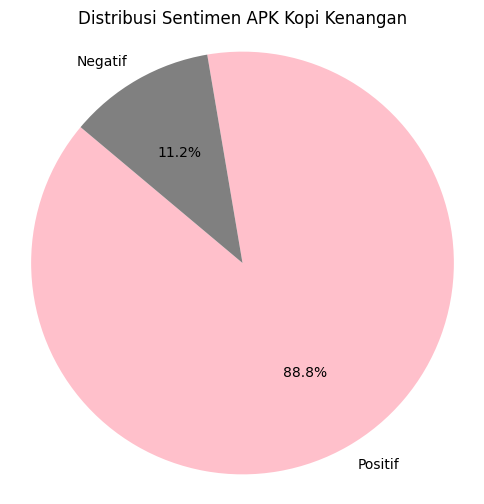

In [58]:
data = clean_df['polarity'].value_counts()
label_mapping = {
    'positive': 'Positif',
    'negative': 'Negatif',
}
labels = [label_mapping.get(label, label) for label in data.index]
plt.figure(figsize=(6,6))
plt.pie(data.values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink','grey'])
plt.title('Distribusi Sentimen APK Kopi Kenangan')
plt.axis('equal')
plt.show()

Terlihat bahwa  aplikasi Kopi Kenangan cenderung positif. Sebanyak 88.8% pengguna aplikasi memberi penilaian positif yang artinya mereka puas dengan aplikasi ini.

### **Eksplorasi Data**

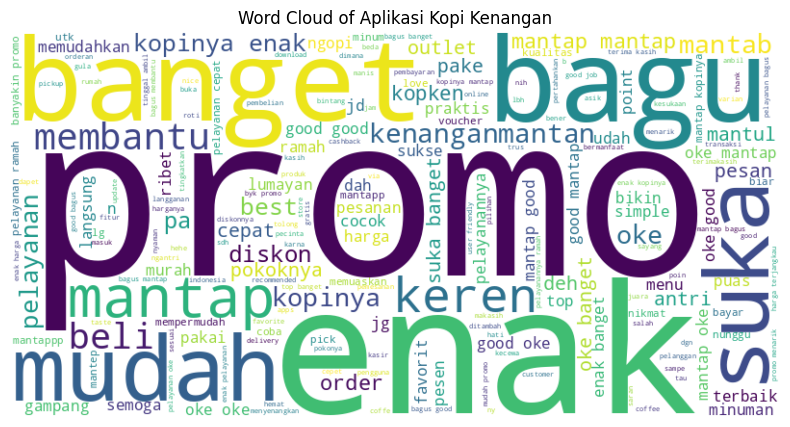

In [59]:
text = " ".join(clean_df['text_akhir'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Aplikasi Kopi Kenangan')
plt.show()


Word Cloud menunjukkan bebrapa kata yang menonjol, yaitu "promo", "enak", "bagus", "suka", "oke", "keren", "mudah", "keren". Kata-kata tersebut menunjukkan bahwa pengguna aplikasi senang dengan promo yang diberikan, puas terhadap fitur dan pelayanan aplikasi yang memudahkan, menyukai menu yang telah dibeli.

## **Data Splitting dan Ekstraksi Fitur**

### **Data Splitting (80:20) dan Ekstraksi Fitur dengan TF-IDF**

#### **Data Splitting (80:20)**

In [60]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf_a = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf_a.toarray(), columns=tfidf.get_feature_names_out())
features_df

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_tfidf_a, y, test_size=0.2, random_state=42)

#### **Naive Bayes**

In [61]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_a.toarray(), y_train_a)

y_pred_train_a_nb = naive_bayes.predict(X_train_a.toarray())
y_pred_test_a_nb = naive_bayes.predict(X_test_a.toarray())

accuracy_train_a_nb = accuracy_score(y_pred_train_a_nb, y_train_a)
accuracy_test_a_nb = accuracy_score(y_pred_test_a_nb, y_test_a)

print('Naive Bayes - accuracy_train:', accuracy_train_a_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_a_nb)

Naive Bayes - accuracy_train: 0.8983250766690257
Naive Bayes - accuracy_test: 0.8882075471698113


#### **Random Forest**

In [62]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_a.toarray(), y_train_a)

y_pred_train_a_rf = random_forest.predict(X_train_a.toarray())
y_pred_test_a_rf = random_forest.predict(X_test_a.toarray())

accuracy_train_a_rf = accuracy_score(y_pred_train_a_rf, y_train_a)
accuracy_test_a_rf = accuracy_score(y_pred_test_a_rf, y_test_a)

print('Random Forest - accuracy_train:', accuracy_train_a_rf)
print('Random Forest - accuracy_test:', accuracy_test_a_rf)

Random Forest - accuracy_train: 0.9790044821891956
Random Forest - accuracy_test: 0.9415094339622642


#### **Regresi Logistic**

In [63]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_a.toarray(), y_train_a)

y_pred_train_a_lr = logistic_regression.predict(X_train_a.toarray())
y_pred_test_a_lr = logistic_regression.predict(X_test_a.toarray())

accuracy_train_a_lr = accuracy_score(y_pred_train_a_lr, y_train_a)
accuracy_test_a_lr = accuracy_score(y_pred_test_a_lr, y_test_a)

print('Logistic Regression - accuracy_train:', accuracy_train_a_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_a_lr)

Logistic Regression - accuracy_train: 0.9504010379806558
Logistic Regression - accuracy_test: 0.9459905660377359


#### **Decision Tree**

In [64]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_a.toarray(), y_train_a)

y_pred_train_a_dt = decision_tree.predict(X_train_a.toarray())
y_pred_test_a_dt = decision_tree.predict(X_test_a.toarray())

accuracy_train_a_dt = accuracy_score(y_pred_train_a_dt, y_train_a)
accuracy_test_a_dt = accuracy_score(y_pred_test_a_dt, y_test_a)

print('Decision Tree - accuracy_train:', accuracy_train_a_dt)
print('Decision Tree - accuracy_test:', accuracy_test_a_dt)

Decision Tree - accuracy_train: 0.9790044821891956
Decision Tree - accuracy_test: 0.9363207547169812


### **Data Splitting (70:30) dan Ekstraksi Fitur dengan TF-IDF**

#### **Data Splitting (70:30)**

In [65]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf_b = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf_b.toarray(), columns=tfidf.get_feature_names_out())
features_df

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_tfidf_b, y, test_size=0.3, random_state=42)

#### **Naive Bayes**

In [66]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_b.toarray(), y_train_b)

y_pred_train_b_nb = naive_bayes.predict(X_train_b.toarray())
y_pred_test_b_nb = naive_bayes.predict(X_test_b.toarray())

accuracy_train_b_nb = accuracy_score(y_pred_train_b_nb, y_train_b)
accuracy_test_b_nb = accuracy_score(y_pred_test_b_nb, y_test_b)

print('Naive Bayes - accuracy_train:', accuracy_train_b_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_b_nb)

Naive Bayes - accuracy_train: 0.9005863719080677
Naive Bayes - accuracy_test: 0.8886617392671804


#### **Random Forest**

In [67]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_b.toarray(), y_train_b)

y_pred_train_b_rf = random_forest.predict(X_train_b.toarray())
y_pred_test_b_rf = random_forest.predict(X_test_b.toarray())

accuracy_train_b_rf = accuracy_score(y_pred_train_b_rf, y_train_b)
accuracy_test_b_rf = accuracy_score(y_pred_test_b_rf, y_test_b)

print('Random Forest - accuracy_train:', accuracy_train_b_rf)
print('Random Forest - accuracy_test:', accuracy_test_b_rf)

Random Forest - accuracy_train: 0.9791736874031138
Random Forest - accuracy_test: 0.9403994338732505


#### **Regresi Logistik**

In [68]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_b.toarray(), y_train_b)

y_pred_train_b_lr = logistic_regression.predict(X_train_b.toarray())
y_pred_test_b_lr = logistic_regression.predict(X_test_b.toarray())

accuracy_train_b_lr = accuracy_score(y_pred_train_b_lr, y_train_b)
accuracy_test_b_lr = accuracy_score(y_pred_test_b_lr, y_test_b)

print('Logistic Regression - accuracy_train:', accuracy_train_b_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_b_lr)

Logistic Regression - accuracy_train: 0.9492485003706949
Logistic Regression - accuracy_test: 0.9441736122031766


#### **Decision Tree**

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_b.toarray(), y_train_b)

y_pred_train_b_dt = decision_tree.predict(X_train_b.toarray())
y_pred_test_b_dt = decision_tree.predict(X_test_b.toarray())

accuracy_train_b_dt = accuracy_score(y_pred_train_b_dt, y_train_b)
accuracy_test_b_dt = accuracy_score(y_pred_test_b_dt, y_test_b)

print('Decision Tree - accuracy_train:', accuracy_train_b_dt)
print('Decision Tree - accuracy_test:', accuracy_test_b_dt)

Decision Tree - accuracy_train: 0.9791736874031138
Decision Tree - accuracy_test: 0.9275043245793364


### **Data Splitting (80:20) dan Ekstraksi Fitur dengan Word2Vec**

#### **Tokenisasi dan Data Splitting (80:20)**

In [70]:
sentences = [word_tokenize(text) for text in clean_df['text_akhir']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

In [71]:
def document_vector(doc, model):
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)
X_vectors = np.array([document_vector(words, w2v_model) for words in sentences])

In [72]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

#### **Naive Bayes**

In [73]:
nb_model = GaussianNB()
nb_model.fit(X_train_c, y_train_c)

y_pred_train_c_nb = nb_model.predict(X_train_c)
y_pred_test_c_nb = nb_model.predict(X_test_c)

print("Naive Bayes (Gaussian) - accuracy_train:", accuracy_score(y_train_c, y_pred_train_c_nb))
print("Naive Bayes (Gaussian) - accuracy_test:", accuracy_score(y_test_c, y_pred_test_c_nb))

Naive Bayes (Gaussian) - accuracy_train: 0.6638947865062514
Naive Bayes (Gaussian) - accuracy_test: 0.6674528301886793


#### **Random Forest**

In [74]:
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_c, y_train_c)

y_pred_train_c_rf = rf_model.predict(X_train_c)
y_pred_test_c_rf = rf_model.predict(X_test_c)

print("Random Forest - accuracy_train:", accuracy_score(y_train_c, y_pred_train_c_rf))
print("Random Forest - accuracy_test:", accuracy_score(y_test_c, y_pred_test_c_rf))

Random Forest - accuracy_train: 0.9995281906109932
Random Forest - accuracy_test: 0.9235849056603773


#### **Regresi Logistik**

In [75]:
lr_model = LogisticRegression()
lr_model.fit(X_train_c, y_train_c)

y_pred_train_c_lr = lr_model.predict(X_train_c)
y_pred_test_c_lr = lr_model.predict(X_test_c)

print("Accuracy Train:", accuracy_score(y_train_c, y_pred_train_c_lr))
print("Accuracy Test:", accuracy_score(y_test_c, y_pred_test_c_lr))

Accuracy Train: 0.9102972399150743
Accuracy Test: 0.9113207547169812


#### **Decision Tree**

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_c, y_train_c)

y_pred_train_c_dt = dt_model.predict(X_train_c)
y_pred_test_c_dt = dt_model.predict(X_test_c)

print("Decision Tree - accuracy_train:", accuracy_score(y_train_c, y_pred_train_c_dt))
print("Decision Tree - accuracy_test:", accuracy_score(y_test_c, y_pred_test_c_dt))

Decision Tree - accuracy_train: 0.9995281906109932
Decision Tree - accuracy_test: 0.8924528301886793


### **Data Splitting (70:30) dan Ekstraksi Fitur dengan Word2Vec**

#### **Tokenisasi dan Data Splitting (70:30)**

In [77]:
sentences = [word_tokenize(text) for text in clean_df['text_akhir']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

In [78]:
def document_vector(doc, model):
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)
X_vectors = np.array([document_vector(words, w2v_model) for words in sentences])

In [79]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_vectors, y, test_size=0.3, random_state=42)

#### **Naive Bayes**


In [80]:
nb_model = GaussianNB()
nb_model.fit(X_train_d, y_train_d)

y_pred_train_d_nb = nb_model.predict(X_train_d)
y_pred_test_d_nb = nb_model.predict(X_test_d)

print("Naive Bayes (Gaussian) - accuracy_train:", accuracy_score(y_train_d, y_pred_train_d_nb))
print("Naive Bayes (Gaussian) - accuracy_test:", accuracy_score(y_test_d, y_pred_test_d_nb))

Naive Bayes (Gaussian) - accuracy_train: 0.6731819100896408
Naive Bayes (Gaussian) - accuracy_test: 0.6713319704356031


#### **Random Forest**


In [81]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_d, y_train_d)

y_pred_train_d_rf = rf_model.predict(X_train_d)
y_pred_test_d_rf = rf_model.predict(X_test_d)

print("Random Forest - accuracy_train:", accuracy_score(y_train_d, y_pred_train_d_rf))
print("Random Forest - accuracy_test:", accuracy_score(y_test_d, y_pred_test_d_rf))

Random Forest - accuracy_train: 0.999595605580643
Random Forest - accuracy_test: 0.9237301462494103


#### **Regresi Logistik**

In [82]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_vectors, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train_d, y_train_d)

y_pred_train_d_lr = lr_model.predict(X_train_d)
y_pred_test_d_lr = lr_model.predict(X_test_d)

print("Accuracy Train:", accuracy_score(y_train_d, y_pred_train_d_lr))
print("Accuracy Test:", accuracy_score(y_test_d, y_pred_test_d_lr))


Accuracy Train: 0.9098200444833862
Accuracy Test: 0.9091052052209467


#### **Decision Tree**

In [83]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_d, y_train_d)

y_pred_train_d_dt = dt_model.predict(X_train_d)
y_pred_test_d_dt = dt_model.predict(X_test_d)

print("Decision Tree - accuracy_train:", accuracy_score(y_train_d, y_pred_train_d_dt))
print("Decision Tree - accuracy_test:", accuracy_score(y_test_d, y_pred_test_d_dt))

Decision Tree - accuracy_train: 0.999595605580643
Decision Tree - accuracy_test: 0.8900770561409027


## **Kesimpulan**

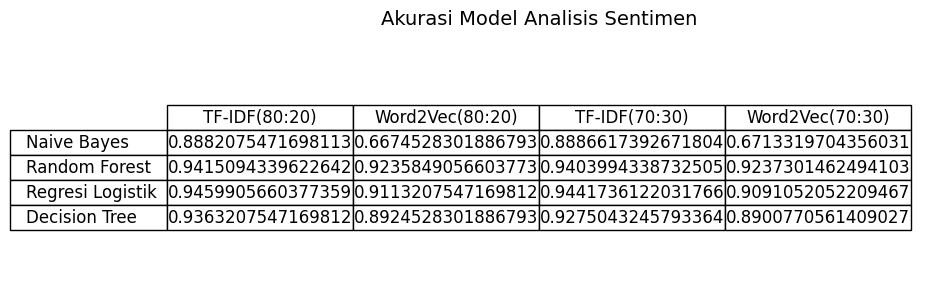

In [84]:
from pandas.plotting import table
data = {
    'TF-IDF(80:20)': [accuracy_test_a_nb, accuracy_test_a_rf, accuracy_test_a_lr, accuracy_test_a_dt],
    'Word2Vec(80:20)': [accuracy_score(y_test_c, y_pred_test_c_nb), accuracy_score(y_test_c, y_pred_test_c_rf), accuracy_score(y_test_c, y_pred_test_c_lr), accuracy_score(y_test_c, y_pred_test_c_dt)],
    'TF-IDF(70:30)': [accuracy_test_b_nb, accuracy_test_b_rf, accuracy_test_b_lr, accuracy_test_b_dt],
    'Word2Vec(70:30)': [accuracy_score(y_test_d, y_pred_test_d_nb), accuracy_score(y_test_d, y_pred_test_d_rf), accuracy_score(y_test_d, y_pred_test_d_lr), accuracy_score(y_test_d, y_pred_test_d_dt)]
}

models = ['Naive Bayes', 'Random Forest', 'Regresi Logistik', 'Decision Tree']
df = pd.DataFrame(data, index=models)

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)
plt.title('Akurasi Model Analisis Sentimen', fontsize=14, pad=20)
plt.savefig('akurasi_model.png', bbox_inches='tight', dpi=300)
plt.show()

Berdasarkan beberapa akurasi model analisis sentimen, dapat disimpulkan bahwa.
- Regresi Logistik dan Random Forest dengan ekstraksi TF-IDF, serta pembagian data 80:20, konsisten memiliki akurasi yang tinggi, yaitu > 94%. Menggunakan ekstraksi Word2Vec dengan pembagian data 80:20 juga menghasilkan akurasi yang cukup tinggi, yaitu > 91.35%  untuk Regresi Logistik dan > 92.98% untuk Random Forest.

- Decision Tree dengan ekstraksi TF-IDF memiliki akurasi yang cukup tinggi, selalu > 92%. Namun, menggunakan ekstraksi Word2Vec menghasilkan akurasi yang kurang jika dibandingkan dengan TF-IDF.

- Naive Bayes memiliki akurasi paling rendah di antara model yang lain. Artinya, Naive Bayes tidak cocok untuk analisis sentimen aplikasi Kopi Kenangan.

- Ekstraksi fitur menggunakan metode TF-IDF menghasilkan akurasi yang lebih tinggi dibandingkan dengan Word2Vec.

- Model terbaik untuk analisis sentimen aplikasi Kopi Kenangan adalah Regresi Logistik dan Random Forest.

- Menggunakan Regresi Logistik dan Random Forest, ekstraksi TF-IDF, serta pembagian data 80:20 dapat disimpulkan bahwa aplikasi Kopi Kenangan memiliki sentimen positif dengan akurasi > 94%

